# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd 
import os 
import json 
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(os.path.join(folder_name, "image_predictions.tsv"), mode = "wb") as file:
    file.write(response.content)

In [4]:
df_prediction = pd.read_csv("image_prediction/image_predictions.tsv", sep ="\t")

In [5]:
df = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})

In [6]:
related_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### visual assessement : 

In [7]:
df_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1870,675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409...,12,10,None,None,None,None,None
965,750429297815552001,NaN,NaN,2016-07-05 20:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnie. He's a Nova Scotian Fridge Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810896069...,11,10,Hunter,None,None,None,None
800,772615324260794368,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gromit. He's pupset bec...,7.652221e+17,4.196984e+09,2016-08-15 16:22:20 +0000,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,None,None,None
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
1628,684588130326986752,NaN,NaN,2016-01-06 04:11:43 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper just got his first kiss. 12/10 he'...,NaN,NaN,NaN,https://vine.co/v/ihWIxntjtO7,12,10,None,None,None,pupper,None
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673688752...,9,10,Larry,None,None,None,None
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None


missing values in "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id"	retweeted_status_user_id

"source" column has HTML code

In [8]:
df_prediction.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1409,770414278348247044,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.580528,False,maillot,0.081449,False,golden_retriever,0.053570,True
288,671159727754231808,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,1,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
2007,877736472329191424,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2,Chesapeake_Bay_retriever,0.837956,True,Labrador_retriever,0.062034,True,Weimaraner,0.040599,True
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,menu,0.026306,False,crossword_puzzle,0.003482,False
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
1655,810284430598270976,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,malamute,0.620768,True,Eskimo_dog,0.158395,True,Tibetan_mastiff,0.028962,True


p1, p2, p3 has some values with uppercase

In [9]:
related_data.sample(15)

,tweet_id,retweet_count,favorite_count
732,781308096455073793,2961,7973
705,785533386513321988,2334,10183
600,798665375516884993,4519,0
721,783085703974514689,2565,9112
2260,667546741521195010,138,355
392,825876512159186944,2146,11525
748,779124354206535695,21324,0
1213,715009755312439296,1392,4550
975,750011400160841729,1035,3568
334,832645525019123713,594,3195


### Programatic Assessment:


In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

since we are not interested in retweets , those missing values are fine, we will deal with them later
expanded urls are missing


In [11]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
related_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


"tweet_id" datatype is integer for 3 datasets 

"timestamp" datatype is not in datetime type 



In [13]:
related_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [14]:
df_archive["retweeted_status_user_id"].isna().value_counts()

True     2175
False     181
Name: retweeted_status_user_id, dtype: int64

there are 181 retweet

In [15]:
df_archive["expanded_urls"].isna().sum()

59

59 null values in "expanded_urls]

In [16]:
df_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

many values in "rating numerator" are invalid

In [17]:
df_archive["text"][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

"text" value contains text and url 

In [18]:
df_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

rating_denominator has values other than 10

In [19]:
print(df_archive["doggo"].value_counts(),      
df_archive["floofer"].value_counts(),
df_archive["pupper"].value_counts(),
df_archive["puppo"].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64 None       2346
floofer      10
Name: floofer, dtype: int64 None      2099
pupper     257
Name: pupper, dtype: int64 None     2326
puppo      30
Name: puppo, dtype: int64


Many dog names are unavailable, 
dog stages are spread in 4 columns

In [20]:
df_prediction[["p1", "p2", "p3"]].head(15)

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


p1, p2, p3 has some uppercase 

In [21]:
df_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues
1. retweets in df

2. Missing values in columns and unnecessary columns

3. tweet_id type are integer instead of string

4. timestamp column in  is not in datetime type 

5. values "floofer" in stage should be named "floof"

6.  rating denominator has values other than 10

7. rating numerator has many invalid values

8. [165, 204, 5,420] are invalid ratings

9. change numerator_rating data type to integer

10. dog breeds in p1, p2, p3 has some uppercase

11. column name with "p" in df_prediction are not understandable

12. some tweets don't have image and prediction data



### Tidiness issues
1.Information about one type of observational unit "tweets" is in 3 tables

2.the dog stage is spread across 4 variables

3.text column contain text and urls




## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
df_archive_copy = df_archive.copy()
df_prediction_copy = df_prediction.copy()
related_data_copy = related_data.copy()

### Issue #1:  many retweets in df_archive

####  Remove all observations in df_archive  that have values in in_reply_to_status_id or retweeted_status_id

#### Code

In [23]:
df_archive = df_archive[(df_archive['in_reply_to_status_id'].isna() == True)  & (df_archive['retweeted_status_id'].isna() == True)]


#### Test

In [24]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #2:  Missing values in columns and unnecessary columns


#### Using the drop method : drop unecessary columns

Code : 

In [25]:
df_archive = df_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                              'retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

Test : 

In [26]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [27]:
df_archive.dropna(axis = 0, how = "any", inplace =True)

In [28]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### Tidiness Issue #1: Information about one type of observational unit "tweets" is in 3 tables:

#### combine df_archive , more_data, df_prediction  table using join(), method on the tweet_id column.

In [29]:
df_merged = df_archive.join(related_data.set_index('tweet_id'), on='tweet_id')
df_combined = df_merged.join(df_prediction.set_index('tweet_id'), on='tweet_id')

Test

In [30]:
df_combined.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [31]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
retweet_count         2094 non-null int64
favorite_count        2094 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null 

### Tidiness Issue #2 : the dog stage is spread across 4 variables

we use replace to remove "None" values then combine 4 columns into 1 and format entries with multiple dog stages

drop columns : "doggo" ,"floofer", "pupper", "puppo" 

Code : 

In [32]:
dog_stages = [ "doggo" ,"floofer", "pupper", "puppo"]
for stage in dog_stages : 
    df_combined[stage].replace('None', '', inplace=True)
    

In [33]:
df_combined['stage'] = df_combined.doggo + df_combined.floofer + df_combined.pupper + df_combined.puppo

In [34]:
df_combined.loc[df_combined.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_combined.loc[df_combined.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_combined.loc[df_combined.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [35]:
df_combined.drop(columns = ["doggo", "floofer", "pupper", "puppo"], inplace = True)

Test

In [36]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
retweet_count         2094 non-null int64
favorite_count        2094 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-nul

### Tidiness Issue #3 : text column contain text and urls

#### using replace method select the url characters and replace them with ""

Code

In [37]:
df_combined["text"] = df_combined["text"].str.replace(r'http\S+', '')

Test 

In [38]:
df_combined.text[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 '

### Issue #3 : tweet_id type are integer instead of string

####  Change the datatype for  tweet_id variable from int to object in the two datasets


#### Code 

In [39]:
df_combined["tweet_id"] = df_combined["tweet_id"].astype(str)


#### Test

In [40]:
type(df_merged["tweet_id"][0])



numpy.int64

### issue #4 :  timestamp column in df_1 is not in datetime type

#### Define : Change timestamp datatype in tweets dataframe from object to datatime type

#### Code

In [41]:
df_combined["timestamp"] = pd.to_datetime(df_merged["timestamp"])

#### Test

In [42]:
type(df_combined["timestamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #5 : values  "floofer" in stage should be named "floof"

#### Use the rename method to rename the column

Code


In [43]:
df_combined["stage"] = df_combined["stage"].str.replace("floofer", "floof")

Test

In [44]:
df_combined[df_combined["stage"] == "floofer"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage


### issue #6 : rating denominator has values other than 10

#### Replace all values with 10 

Code : 

In [45]:
df_combined["rating_denominator"] = 10

Test

In [46]:
df_combined["rating_denominator"].unique()

array([10])

### issue #7 : rating numerator has many invalid values

#### "text" value contains rating
#### so we will try to take rating from text

code

In [47]:
rating_df = df_combined.text.str.extract(r"(\d+\d*\/\d+)")
rating_df.rename(columns = {0 : "rating"}, inplace = True)

In [48]:
rating_df["rating"] = rating_df["rating"].str[:-3]

In [49]:
df_combined["rating_numerator"].replace(rating_df["rating"], inplace = True)

Test

In [50]:
df_combined["rating_numerator"].value_counts()

13     1620
12      316
14      153
11        1
204       1
165       1
420       1
5         1
Name: rating_numerator, dtype: int64

stil, after fixing almost all the numerators we have some numbers that we can't consider as a rating 

Two new quality issues : 

. [165, 204, 5,] 4420 are invalid ratings 

. change datatype from string to integer 

### issue #8 : [165, 204, 5,420] are invalid ratings

#### replace invalid ratings with np.nan then drop rows that has any null value

Code

In [51]:
invalid_ratings = [165, 204, 5,420] 
df_combined["rating_numerator"].replace(to_replace = invalid_ratings, value = np.nan, inplace =True)
df_combined.dropna(axis = 0 , how = "any", inplace = True)
     
        
    

In [52]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1968 non-null object
timestamp             1968 non-null datetime64[ns]
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null object
rating_denominator    1968 non-null int64
name                  1968 non-null object
retweet_count         1968 non-null int64
favorite_count        1968 non-null int64
jpg_url               1968 non-null object
img_num               1968 non-null float64
p1                    1968 non-null object
p1_conf               1968 non-null float64
p1_dog                1968 non-null object
p2                    1968 non-null object
p2_conf               1968 non-null float64
p2_dog                1968 non-null object
p3                    1968 non-null object
p3_conf               1968 non-null float64
p3_dog                19

### issue #9 : change numerator_rating data type to integer

#### Use the astype to change the datatype to integer

Code

In [53]:
df_combined["rating_numerator"] = df_combined["rating_numerator"].astype(float)

Test

In [54]:
type(df_combined["rating_numerator"][0])

numpy.float64

### issue #10 dog breeds in p1, p2, p3 has some uppercase

#### Use the str.lower to p1, p2, p3

Code

In [55]:
df_prediction['p1'] = df_prediction['p1'].str.lower()
df_prediction['p2'] = df_prediction['p2'].str.lower()
df_prediction['p3'] = df_prediction['p3'].str.lower()

In [56]:
df_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,indian_elephant,0.172844,False,water_buffalo,0.038902,False
1910,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False,beach_wagon,0.112846,False,convertible,0.086252,False
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,pomeranian,0.491022,True,weasel,0.130879,False,yorkshire_terrier,0.099241,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,chihuahua,0.086951,True
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1701,817120970343411712,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,saluki,0.568809,True,afghan_hound,0.229352,True,golden_retriever,0.157130,True
1767,826958653328592898,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,tibetan_mastiff,0.014110,True,gibbon,0.002358,False
406,673708611235921920,https://pbs.twimg.com/media/CVl-Z0dWcAAs7wr.jpg,1,golden_retriever,0.936333,True,cocker_spaniel,0.024211,True,labrador_retriever,0.009435,True


### issue #11 : column name with "p" in df_prediction are not understandable

#### use lambda function to change any "p" characters to "prediction"

Code : 

In [57]:
df_combined = df_combined.rename(columns= lambda x: x.replace("p", "prediction"))


In [58]:
df_combined = df_combined.rename(columns = {"jpredictiong_url": "jpg_url"})

Test : 

In [59]:
df_combined.columns

Index(['tweet_id', 'timestamprediction', 'source', 'text',
       'expredictionanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num',
       'prediction1', 'prediction1_conf', 'prediction1_dog', 'prediction2',
       'prediction2_conf', 'prediction2_dog', 'prediction3',
       'prediction3_conf', 'prediction3_dog', 'stage'],
      dtype='object')

### issue #12 : some tweets don't have image and prediction data

#### Drop tweets that don't have image and prediction data

Code :


In [60]:
df_combined.dropna(axis = 0, how = "any", inplace = True)

Test : 

In [61]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                  1968 non-null object
timestamprediction        1968 non-null datetime64[ns]
source                    1968 non-null object
text                      1968 non-null object
expredictionanded_urls    1968 non-null object
rating_numerator          1968 non-null float64
rating_denominator        1968 non-null int64
name                      1968 non-null object
retweet_count             1968 non-null int64
favorite_count            1968 non-null int64
jpg_url                   1968 non-null object
img_num                   1968 non-null float64
prediction1               1968 non-null object
prediction1_conf          1968 non-null float64
prediction1_dog           1968 non-null object
prediction2               1968 non-null object
prediction2_conf          1968 non-null float64
prediction2_dog           1968 non-null object
prediction3               1968 non-nul

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
df_combined.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [63]:
df_combined.sample(10)

,tweet_id,timestamprediction,source,text,expredictionanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog,stage
2252,667801013445750784,2015-11-20 20:25:43,"<a href=""http://twitter.com/download/iphone"" r...",OMIGOD 12/10,https://twitter.com/dog_rates/status/667801013...,13.0,10,None,101,346,...,flat-coated_retriever,0.508392,True,Chesapeake_Bay_retriever,0.262239,True,curly-coated_retriever,0.048920,True,
1749,679047485189439488,2015-12-21 21:15:11,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,https://twitter.com/dog_rates/status/679047485...,14.0,10,None,781,2460,...,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True,
1873,675145476954566656,2015-12-11 02:49:59,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,https://twitter.com/dog_rates/status/675145476...,14.0,10,None,1011,2305,...,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True,
2033,671744970634719232,2015-12-01 17:37:36,"<a href=""http://twitter.com/download/iphone"" r...",Very fit horned dog here. Looks powerful. Not ...,https://twitter.com/dog_rates/status/671744970...,13.0,10,None,841,1430,...,ice_bear,0.251193,False,ram,0.213839,False,Arctic_fox,0.081551,False,
2246,667878741721415682,2015-11-21 01:34:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,https://twitter.com/dog_rates/status/667878741...,12.0,10,Tedrick,127,409,...,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True,
1261,710153181850935296,2016-03-16 17:18:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Lacy. She's tipping her hat to you. Da...,https://twitter.com/dog_rates/status/710153181...,13.0,10,Lacy,1006,3153,...,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True,
1207,715733265223708672,2016-04-01 02:51:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,13.0,10,a,1920,5093,...,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True,
1234,712717840512598017,2016-03-23 19:09:09,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,https://twitter.com/dog_rates/status/712717840...,13.0,10,None,5616,13474,...,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True,
1351,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12.0,10,a,1028,3201,...,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,
507,812709060537683968,2016-12-24 17:18:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,https://twitter.com/dog_rates/status/812709060...,13.0,10,Brandi,1665,7373,...,Irish_setter,0.326873,True,golden_retriever,0.182610,True,Leonberg,0.156912,True,


In [64]:
df_combined.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,prediction1_conf,prediction2_conf,prediction3_conf
count,1968.000000,1968.0,1968.000000,1968.000000,1968.000000,1968.000000,1.968000e+03,1.968000e+03
mean,12.927846,10.0,2784.478150,8953.855691,1.202236,0.594938,1.346584e-01,6.015044e-02
std,0.498984,0.0,4701.013857,12276.390358,0.559391,0.272070,1.011071e-01,5.097203e-02
min,5.000000,10.0,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,13.000000,10.0,627.750000,1984.000000,1.000000,0.363174,5.345650e-02,1.605498e-02
50%,13.000000,10.0,1366.500000,4141.000000,1.000000,0.588030,1.174550e-01,4.933745e-02
75%,13.000000,10.0,3238.500000,11412.250000,1.000000,0.848400,1.956673e-01,9.152147e-02
max,14.000000,10.0,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


1. in "prediction1_conf", the data shows us  how confident the algorithm is . using the describe method, "prediction1_conf" has a higher mean, max and min value than "prediction2_conf"  which has higher values than "prediction3conf". We can see that the "prediction1_conf" median is 0.588 (58.8%) which is not high. the prediction is not very accurate.

2. In the "retweet_count" the median is equal to 1366.5 and the mean is equal to 2784.47 this explains that the distribution is skewed to the right and the data contains outliers as we can see the min, max , std values especially the max which is 79515


In [65]:
df_combined.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,prediction1_conf,prediction2_conf,prediction3_conf
rating_numerator,1.000000,NaN,-0.286370,-0.359971,-0.111617,-0.037121,-0.002287,-0.004356
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,-0.286370,NaN,1.000000,0.913064,0.108336,0.053969,-0.018637,-0.043454
favorite_count,-0.359971,NaN,0.913064,1.000000,0.138212,0.078144,-0.021680,-0.052480
img_num,-0.111617,NaN,0.108336,0.138212,1.000000,0.202475,-0.157208,-0.137649
prediction1_conf,-0.037121,NaN,0.053969,0.078144,0.202475,1.000000,-0.511836,-0.708508
prediction2_conf,-0.002287,NaN,-0.018637,-0.021680,-0.157208,-0.511836,1.000000,0.480881
prediction3_conf,-0.004356,NaN,-0.043454,-0.052480,-0.137649,-0.708508,0.480881,1.000000


3. in the correlation table, we can see that there is a high positive correlation between "favourite_count" and "retweet_count". that mean if one increase by 1 count the other increases by 0.913 .
4. between "prediction1_conf" and "prediction2_conf" there is negative correlation : -0.708 which means if the first prediction is high in confidence the other is affected. which is very logical , if the first prediction guess the breed of the dog the third prediction is likely to be not accurate  


### Visualization

In [66]:
rating = df_combined["rating_numerator"].value_counts()


Text(0.5,1,'frequency table of rating_numerator')

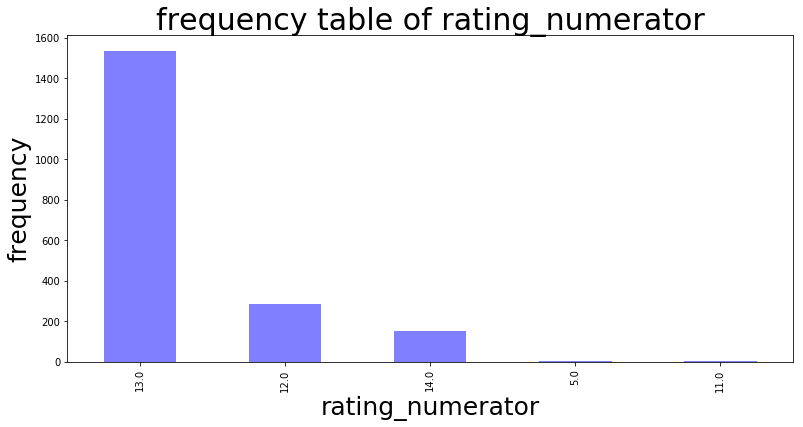

In [67]:
rating.plot(kind = "bar", x = "rating_numerator" ,  color = "blue", alpha = 0.5,figsize = (13,6))
plt.xlabel("rating_numerator",fontsize = 25)
plt.ylabel("frequency" , fontsize = 25)
plt.title("frequency table of rating_numerator" , fontsize = 30)

as we can see in the bar chart the rating with the highest frequency is by far value '13' most of tweet rates a are 13 with over 1500 occurences, then 12 and 14 with respectively 282 and 150